# Spotify 1 Million Tracks

### Descrição

This dataset was extracted from the Spotify platform using the Python library "Spotipy", which allows users to access music data provided via APIs. The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data. Its significance lies in its potential to unravel patterns and predict song popularity prior to its release. 

### Os Dados

///// Falta incluir mais features

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

### Importe das Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Compreender os dados

In [4]:
data = pd.read_csv('dataset/spotify_data.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [7]:
data.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


Verificamos que a maioria dos dados tem uma popularidade inferior a 20.

In [8]:
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [9]:
data.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.325,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.431,0.000063,0.1250,0.2020,133.885,239133,3
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,-7.292,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4


In [10]:
data['popularity'].describe().apply("{0:.2f}".format)

count    1159764.00
mean          18.38
std           15.89
min            0.00
25%            5.00
50%           15.00
75%           29.00
max          100.00
Name: popularity, dtype: object

In [9]:
#data.sort_values(by=['popularity'], ascending=False).to_csv('dataset/spotify_data_sorted.csv')

### Preparação e transformação dos dados

Missing Values

In [10]:
#sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Veriricamos que não há missing values

In [11]:
# Drop Id and Track Id columns
data.drop(['Unnamed: 0', 'track_id', 'track_name'], axis=1, inplace=True, errors='ignore')
#data = data.filter(['popularity', 'duration_ms', 'instrumentalness', 'year'])
data.head()

,artist_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


### Analisar os dados

In [12]:
data['popularity'].value_counts()

popularity
0      158391
1       39820
2       31247
8       30322
9       29249
        ...  
93          3
94          1
96          1
100         1
95          1
Name: count, Length: 98, dtype: int64

<Axes: >

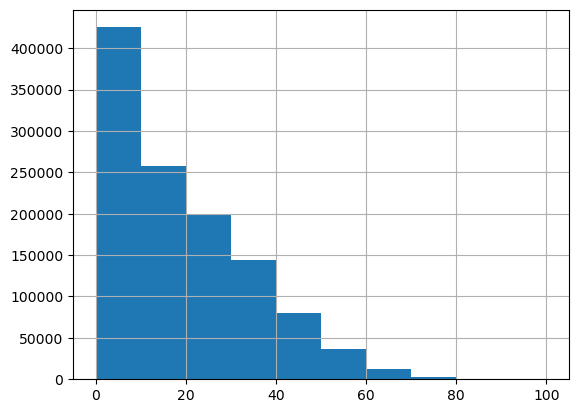

In [13]:
data['popularity'].hist()

In [14]:
data['artist_name'].value_counts()

artist_name
Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: count, Length: 64158, dtype: int64

In [15]:
by_artist_name = data.groupby(by=['artist_name']).agg({'tempo':'count', 'popularity':'mean'}).rename(columns={'tempo':'count'}).reset_index().sort_values(by=['popularity'], ascending=False)
by_artist_name[by_artist_name['count'] > 12] # Only show artists with more than N songs

,artist_name,count,popularity
22938,Harry Styles,35,75.685714
41511,Olivia Rodrigo,14,75.428571
6669,Bizarrap,14,74.857143
45548,Rauw Alejandro,26,71.923077
18811,Feid,19,71.894737
...,...,...,...
31730,Laudamus,17,0.000000
13307,Dark Project,18,0.000000
57238,Thirst,15,0.000000
13294,Dark Franklin,15,0.000000


In [16]:
data.groupby(by=['year']).mean(numeric_only=True)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,
2000,10.736181,0.528590,0.604446,5.289912,-10.148483,0.664464,0.084210,0.362329,0.239420,0.219137,0.507284,119.853731,259887.548190,3.876891
2001,11.253359,0.524793,0.600322,5.304999,-10.097640,0.663715,0.085461,0.361939,0.245478,0.219772,0.488250,119.115111,261913.330665,3.874501
2002,11.679041,0.531639,0.622776,5.305591,-9.587969,0.653152,0.085943,0.339893,0.243533,0.224506,0.498285,119.802349,263335.524369,3.885136
2003,12.435730,0.526321,0.627254,5.283657,-9.375994,0.659200,0.087809,0.340997,0.240454,0.224276,0.491708,120.105939,258998.805183,3.875142
2004,12.298732,0.530033,0.637659,5.299723,-9.109423,0.650196,0.087039,0.332912,0.228983,0.228731,0.491882,120.454719,258381.273727,3.886840
2005,13.424920,0.525539,0.631740,5.320009,-9.267861,0.649223,0.088181,0.333991,0.241071,0.228456,0.487335,120.741856,261665.490566,3.877136
2006,13.137903,0.533050,0.634384,5.322668,-9.139491,0.647051,0.089972,0.332268,0.248002,0.224144,0.486790,120.946902,263190.082970,3.884132
2007,13.471446,0.533309,0.644446,5.321971,-9.028157,0.644595,0.092813,0.324328,0.251806,0.228937,0.478078,121.062447,264918.808700,3.885546
2008,13.462894,0.534577,0.651215,5.297900,-8.763337,0.647306,0.090511,0.310635,0.258509,0.226360,0.476483,122.401332,263923.319763,3.888514


More recent songs are more popular

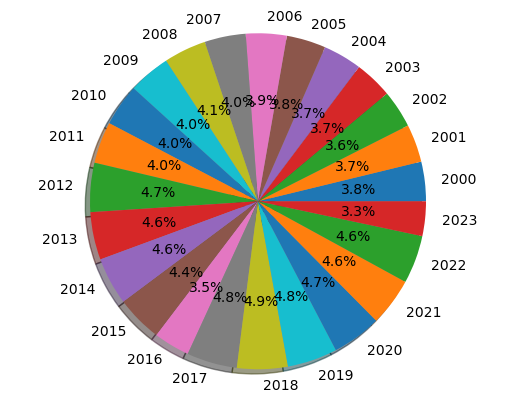

In [17]:
labels = data['year'].astype('category').cat.categories.tolist()
counts = data['year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [18]:
data.groupby(by=['genre']).mean(numeric_only=True).sort_values(by=['popularity'], ascending=False)

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,,,
pop,55.685806,2011.413633,0.591804,0.621308,5.199198,-6.886746,0.675862,0.067890,0.296180,0.023266,0.180150,0.490589,122.231822,226688.853408,3.932799
hip-hop,46.315736,2012.698529,0.711836,0.671360,5.300834,-6.657922,0.553334,0.209123,0.173402,0.018546,0.214033,0.521298,119.598942,215730.925747,3.974973
rock,46.228985,2012.956312,0.561714,0.661280,5.251281,-7.107991,0.683037,0.060313,0.223403,0.071993,0.193011,0.499320,123.465617,233152.755047,3.936728
dance,43.034337,2011.255752,0.658539,0.725452,5.327097,-5.877088,0.565013,0.099444,0.131716,0.063779,0.195262,0.538534,121.728344,223404.429933,3.978794
metal,39.698860,2013.672507,0.427253,0.882898,5.197863,-4.846604,0.546154,0.096246,0.027337,0.090660,0.241166,0.347291,130.452288,243614.999430,3.904843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chicago-house,3.260542,2014.660542,0.774285,0.748278,5.769052,-8.705806,0.530368,0.075915,0.032253,0.525092,0.138774,0.570474,125.026535,385620.022631,3.995938
detroit-techno,2.953827,2014.591327,0.730965,0.732981,5.681633,-10.303683,0.531122,0.072965,0.055777,0.745791,0.130062,0.451984,127.677153,381361.918622,3.977551
grindcore,2.647805,2012.433662,0.267414,0.921175,5.248811,-5.814207,0.659935,0.133797,0.012155,0.521953,0.288697,0.197231,117.839448,120561.594459,3.710180


In [19]:
data.groupby(by=['time_signature']).mean(numeric_only=True).sort_values(by=['popularity'], ascending=False)

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
time_signature,,,,,,,,,,,,,,
4,18.672898,2011.975094,0.555467,0.666106,5.306888,-8.423481,0.631137,0.087476,0.285799,0.242107,0.220817,0.473268,121.995072,251274.030677
0,17.741042,2012.464169,0.008270,0.329559,4.854235,-17.701136,0.670195,0.003408,0.384399,0.570526,0.316134,0.006525,2.789208,186132.426710
3,16.609791,2011.741356,0.419745,0.461082,5.150002,-12.454381,0.665385,0.115249,0.562418,0.313276,0.233339,0.339665,119.913022,244682.085684
5,16.029295,2012.162039,0.423001,0.472472,5.206856,-13.279957,0.628438,0.192361,0.558401,0.324018,0.250357,0.341240,113.833712,219070.703292
1,15.299131,2011.823144,0.400500,0.445952,5.172986,-14.089773,0.650474,0.148834,0.603191,0.369036,0.248783,0.320668,110.167710,217403.357741


In [20]:
# muito demorado
#sns.pairplot(data, hue='popularity')

<Axes: >

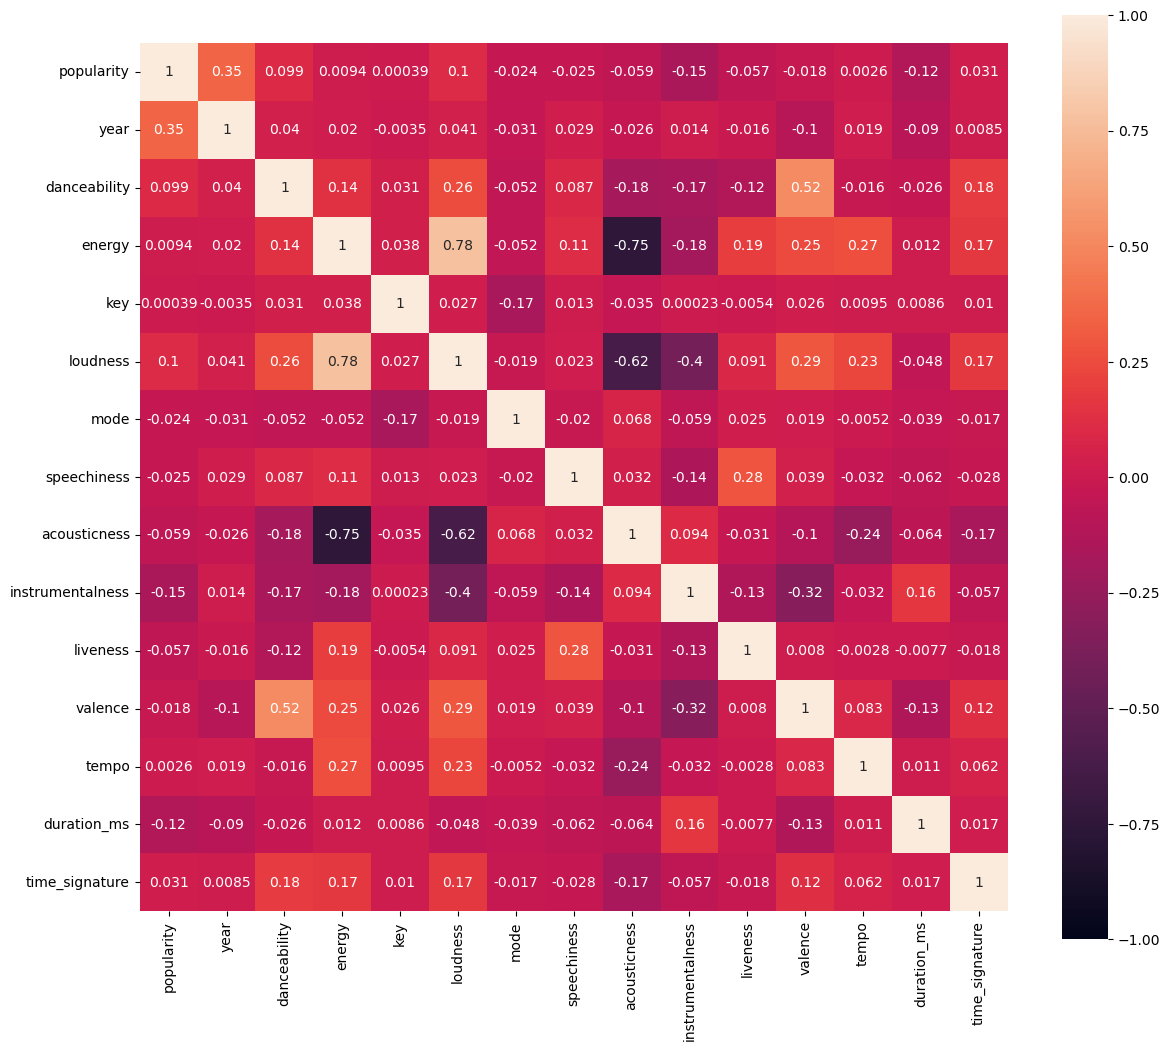

In [20]:
# Define data_non_categorical
data_non_categorical = data.select_dtypes(exclude=['object'])

# Pearson Method
corr_matrix = data_non_categorical.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

<Axes: >

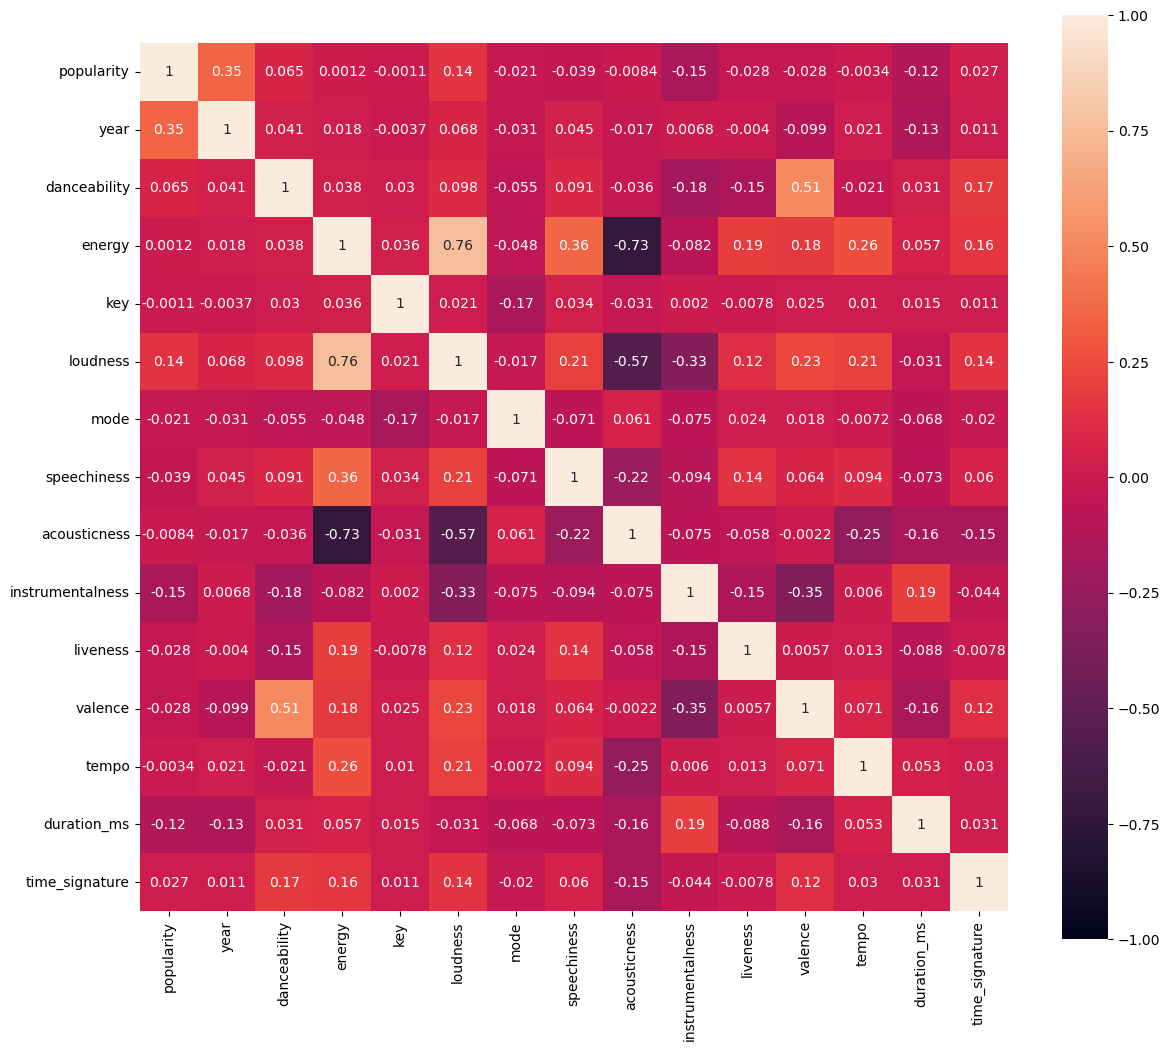

In [23]:
# Spearman method
corr_matrix = data_non_categorical.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

<Axes: >

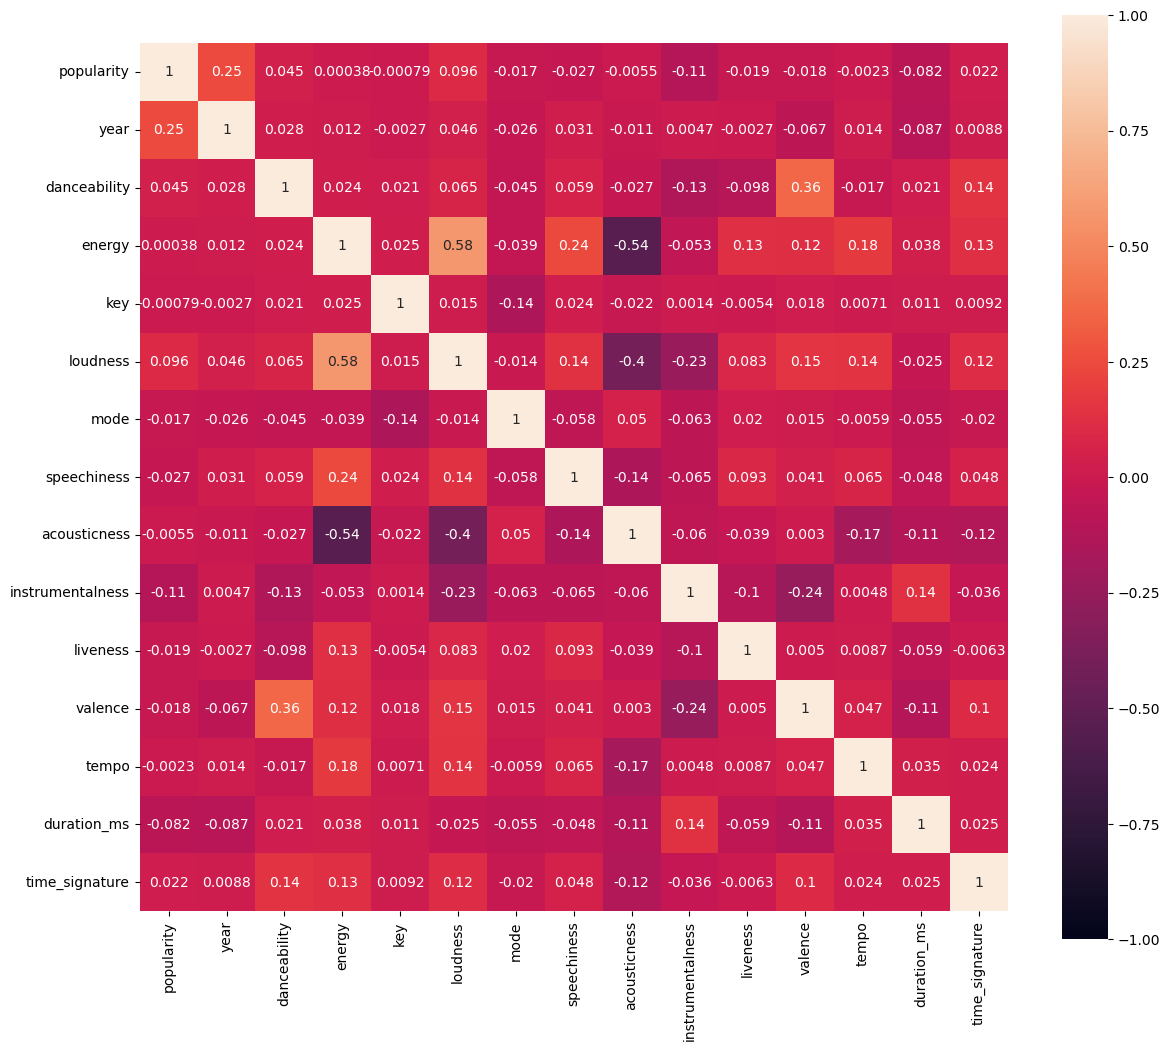

In [24]:
# Kendall method
corr_matrix = data_non_categorical.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

# Multivariate Analysis

Analyse the relationships between multiple variables

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

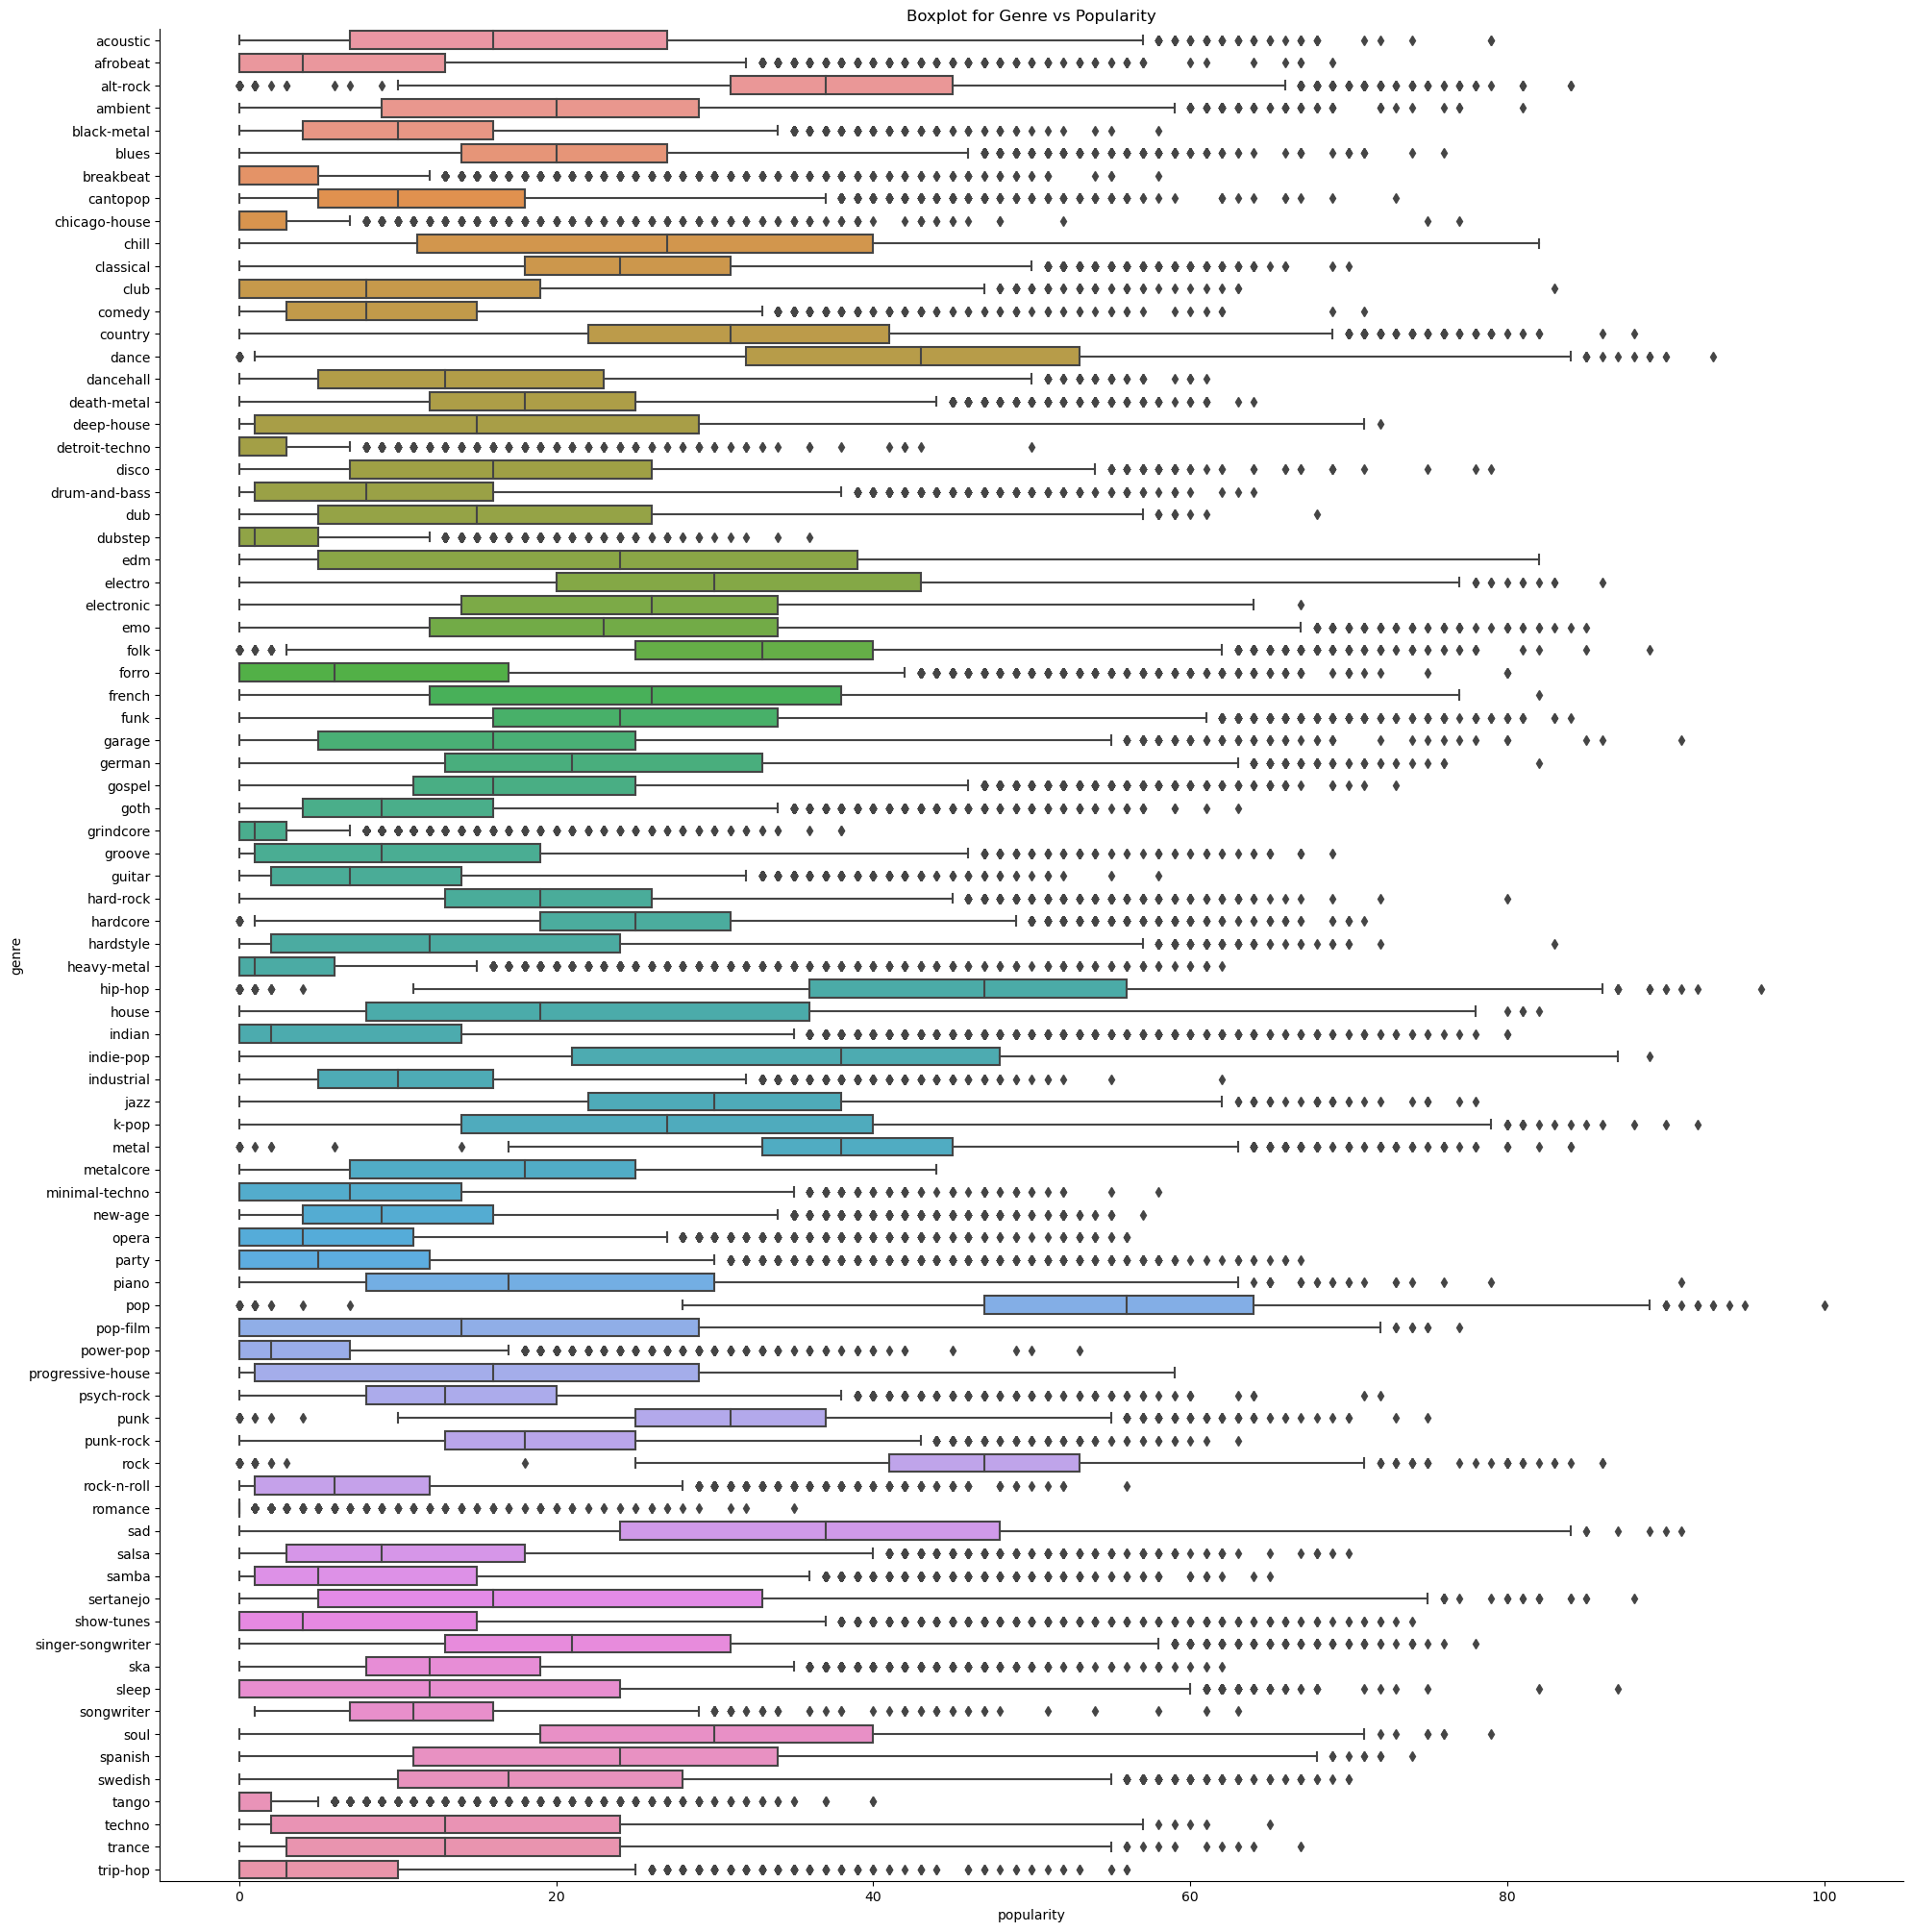

In [41]:
fig = plt.figure(figsize=(16, 8))
sns.catplot(y='genre', x='popularity', data=data, kind='box', aspect=1, orient='h', height=20)
plt.title('Boxplot for Genre vs Popularity')
plt.show()

In [90]:
q3 = data.groupby(by=['genre']).quantile(0.75,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']
q1 = data.groupby(by=['genre']).quantile(0.25,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']

data_aux = data.merge(q1, left_on='genre', right_index=True, suffixes=('', '_q1'))
data_aux = data_aux.merge(q3, left_on='genre', right_index=True, suffixes=('', '_q3'))
data_aux['iqr'] = data_aux['popularity_q3'] - data_aux['popularity_q1']

#data_aux
# Verificar os outliers
no_outliers = data_aux[(data_aux['popularity'] <= data_aux['popularity_q3'] + 1.5 * data_aux['iqr']) & (data_aux['popularity'] >= data_aux['popularity_q1'] - 1.5 * data_aux['iqr'])]
no_outliers.drop(['popularity_q1', 'popularity_q3', 'iqr'], axis=1, inplace=True)
no_outliers

/tmp/ipykernel_38746/1764623222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers.drop(['popularity_q1', 'popularity_q3', 'iqr'], axis=1, inplace=True)


,artist_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Jason Mraz,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,Joshua Hyslop,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
4,Andrew Belle,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
5,Chris Smither,48,2012,acoustic,0.566,0.570,2,-6.420,1,0.0329,0.6880,0.000002,0.0943,0.9600,83.403,166240,4
6,Matt Wertz,48,2012,acoustic,0.575,0.606,9,-8.197,1,0.0300,0.0119,0.000000,0.0675,0.3640,121.083,152307,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,Nicola Conte,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,Amon Tobin,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,Peace Orchestra,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

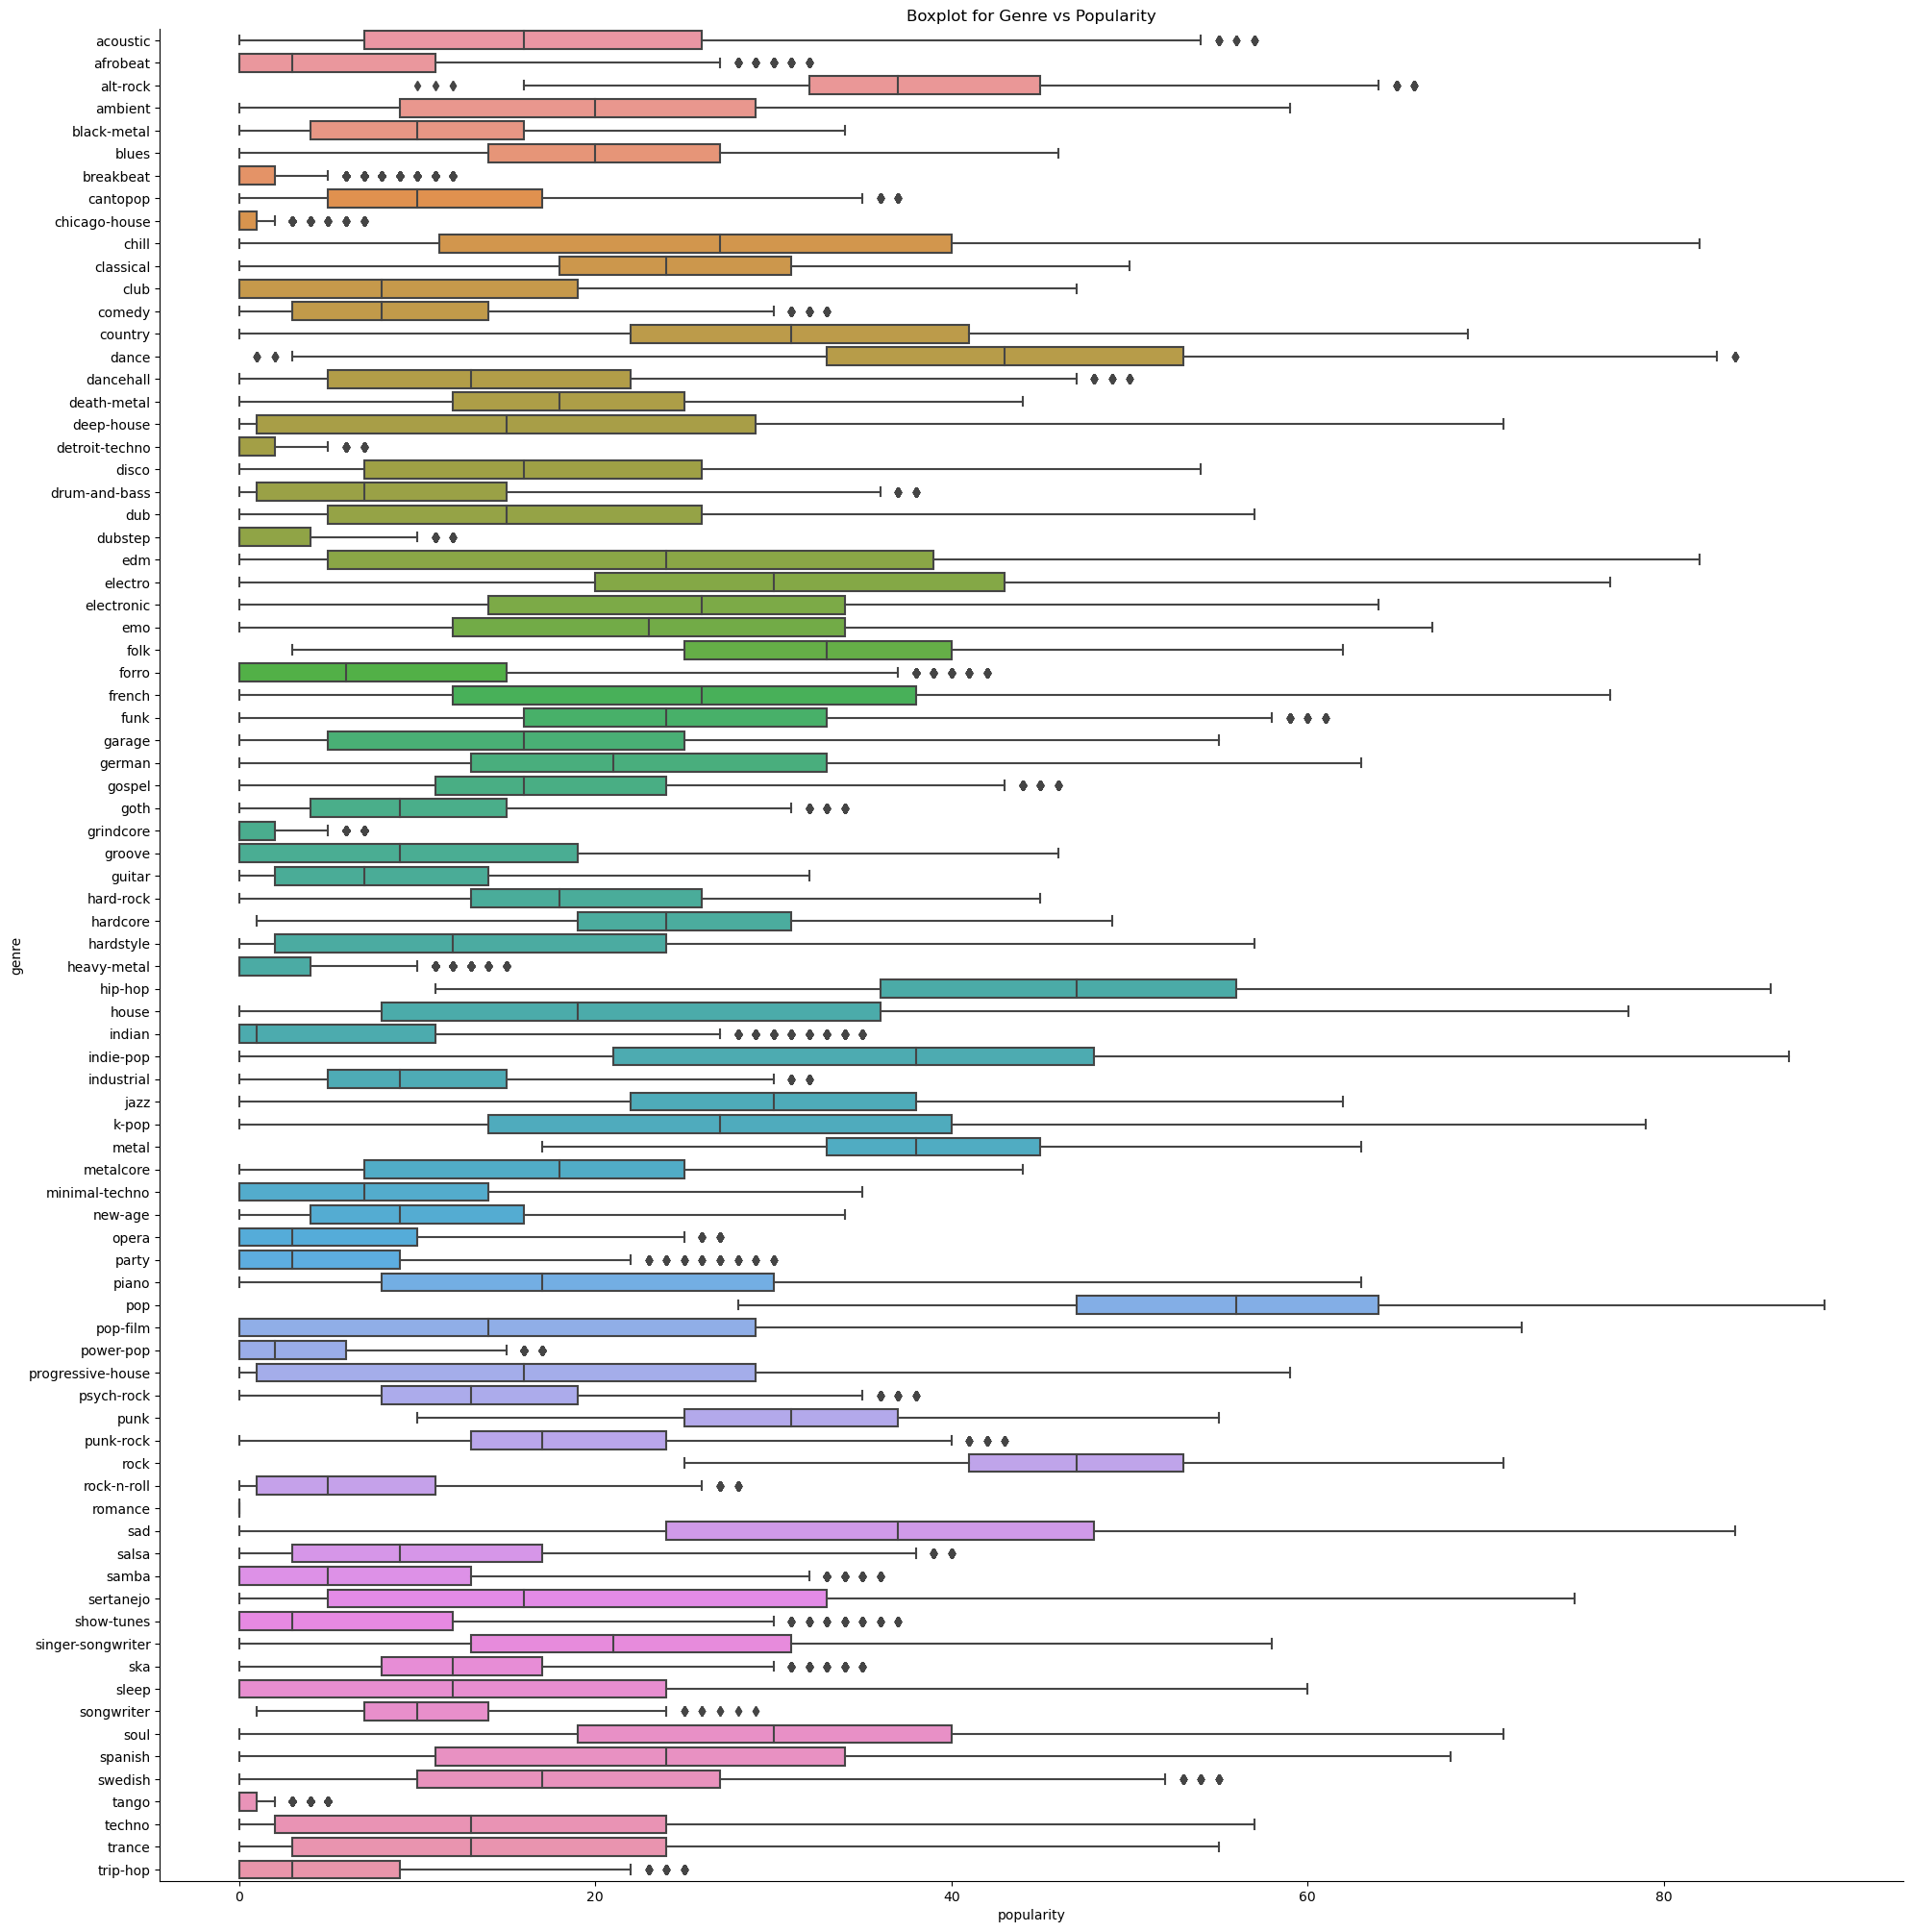

In [91]:
fig = plt.figure(figsize=(16, 8))
sns.catplot(y='genre', x='popularity', data=no_outliers, kind='box', aspect=1, orient='h', height=20)
plt.title('Boxplot for Genre vs Popularity')
plt.show()

In [147]:
# Pearson Method
corr_matrix = no_outliers.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

ValueError: could not convert string to float: 'Jason Mraz'

In [92]:
data_non_categorical = no_outliers.copy()
lb_make = LabelEncoder()
data_non_categorical['artist_name'] = lb_make.fit_transform(data_non_categorical['artist_name'])
data_non_categorical['genre'] = lb_make.fit_transform(data_non_categorical['genre'])
data_non_categorical

,artist_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,26110,50,2012,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,27992,57,2012,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
4,2997,54,2012,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
5,10313,48,2012,0,0.566,0.570,2,-6.420,1,0.0329,0.6880,0.000002,0.0943,0.9600,83.403,166240,4
6,36204,48,2012,0,0.575,0.606,9,-8.197,1,0.0300,0.0119,0.000000,0.0675,0.3640,121.083,152307,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,40056,4,2011,81,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,40056,3,2011,81,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,2709,2,2011,81,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,42879,0,2011,81,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [116]:
data_non_categorical = data_non_categorical[data_non_categorical['popularity'] > 4]

# Training a Linear Regression Model

In [119]:
#print(data_non_categorical)
X = data_non_categorical.drop('popularity', axis=1)
y = data_non_categorical['popularity']
print(X)
print(y)

         artist_name  year  genre  danceability  energy  key  loudness  mode  \
1              26110  2012      0         0.572   0.454    3   -10.286     1   
2              27992  2012      0         0.409   0.234    3   -13.711     1   
4               2997  2012      0         0.430   0.791    6    -5.419     0   
5              10313  2012      0         0.566   0.570    2    -6.420     1   
6              36204  2012      0         0.575   0.606    9    -8.197     1   
...              ...   ...    ...           ...     ...  ...       ...   ...   
1159747        38656  2011     81         0.906   0.498    2   -10.182     0   
1159752        40056  2011     81         0.473   0.545    5   -11.385     0   
1159754        40056  2011     81         0.505   0.790    1    -7.230     1   
1159757        40056  2011     81         0.441   0.718    5    -7.540     1   
1159758        40056  2011     81         0.551   0.728    9    -6.904     0   

         speechiness  acousticness  ins

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

<Axes: xlabel='popularity', ylabel='Count'>

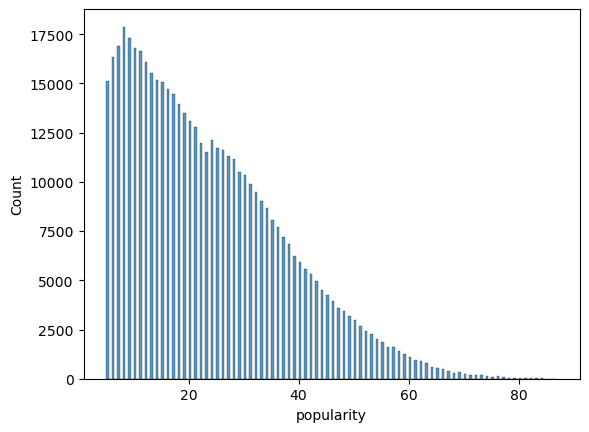

In [121]:
sns.histplot(y_train)

<Axes: xlabel='popularity', ylabel='Count'>

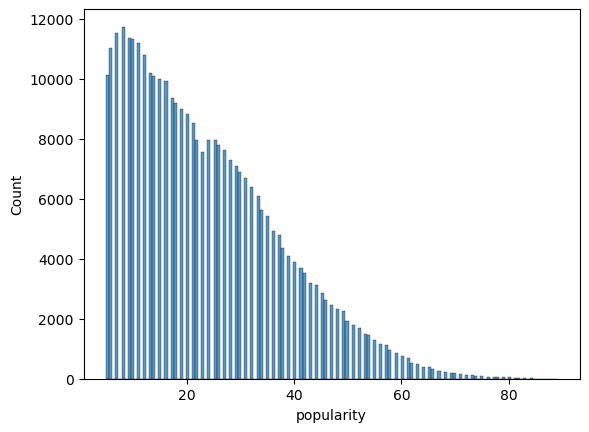

In [122]:
sns.histplot(y_test)

# Creating and Training the Model

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Predictions from our Model

In [125]:
predictions = lm.predict(X_test)

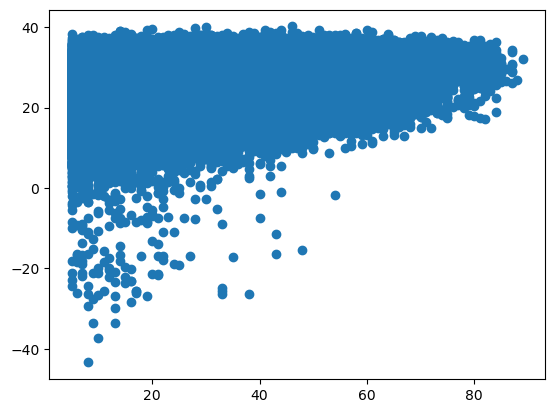

In [126]:
plt.scatter(y_test, predictions)

In [127]:
predictions.max()

40.175801762026595

In [114]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(predictions), left_index=True, right_index=True)    

,popularity,0
311731,36,17.667571
332378,23,15.198212
56432,60,19.680593
321027,76,27.400472
160788,9,21.431990
...,...,...
166383,21,15.638015
359613,24,19.386438
315462,30,22.413425
224323,26,16.571360


In [115]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10.864605348333765
MSE: 183.32420433314502
RMSE: 13.53972689285663


## Problema de Classificação

Uma outra forma de resolver este problema de previsão da popularidade de uma música consiste em transformar a feature 'popularity', target do nosso problema, numa feature discreta, dividindo a gama de valores contínuos (0 a 100) numa série de bins, ou seja intervalos de popularidade. Por exemplo, para 10 bins, o objetivo passaria a ser o de prever qual o nível de popularidade de uma música (Nível 0 - 0..10, Nível 1 - 10..20, etc)

Vamos então transformar a feature 'popularity' numa feature discreta, recorrendo à funcionalidade KBinsDiscretizer do módulo Sci-kit learn.
Este módulo permite realizar binning de duas estratégias diferentes:

- ‘uniform’: All bins in each feature have identical widths.

- ‘quantile’: All bins in each feature have the same number of points.

In [155]:
estimator = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['popularity_binned'] = estimator.fit_transform(data[['popularity']])
data['popularity_binned'].value_counts()
data.drop(['popularity'], axis=1)

,artist_name,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_binned
0,Jason Mraz,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3,4.0
1,Jason Mraz,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4,4.0
2,Joshua Hyslop,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4,4.0
3,Boyce Avenue,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4,4.0
4,Andrew Belle,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3,1.0
1159760,Nicola Conte,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4,1.0
1159761,Amon Tobin,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4,0.0
1159762,Peace Orchestra,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3,0.0


<Axes: >

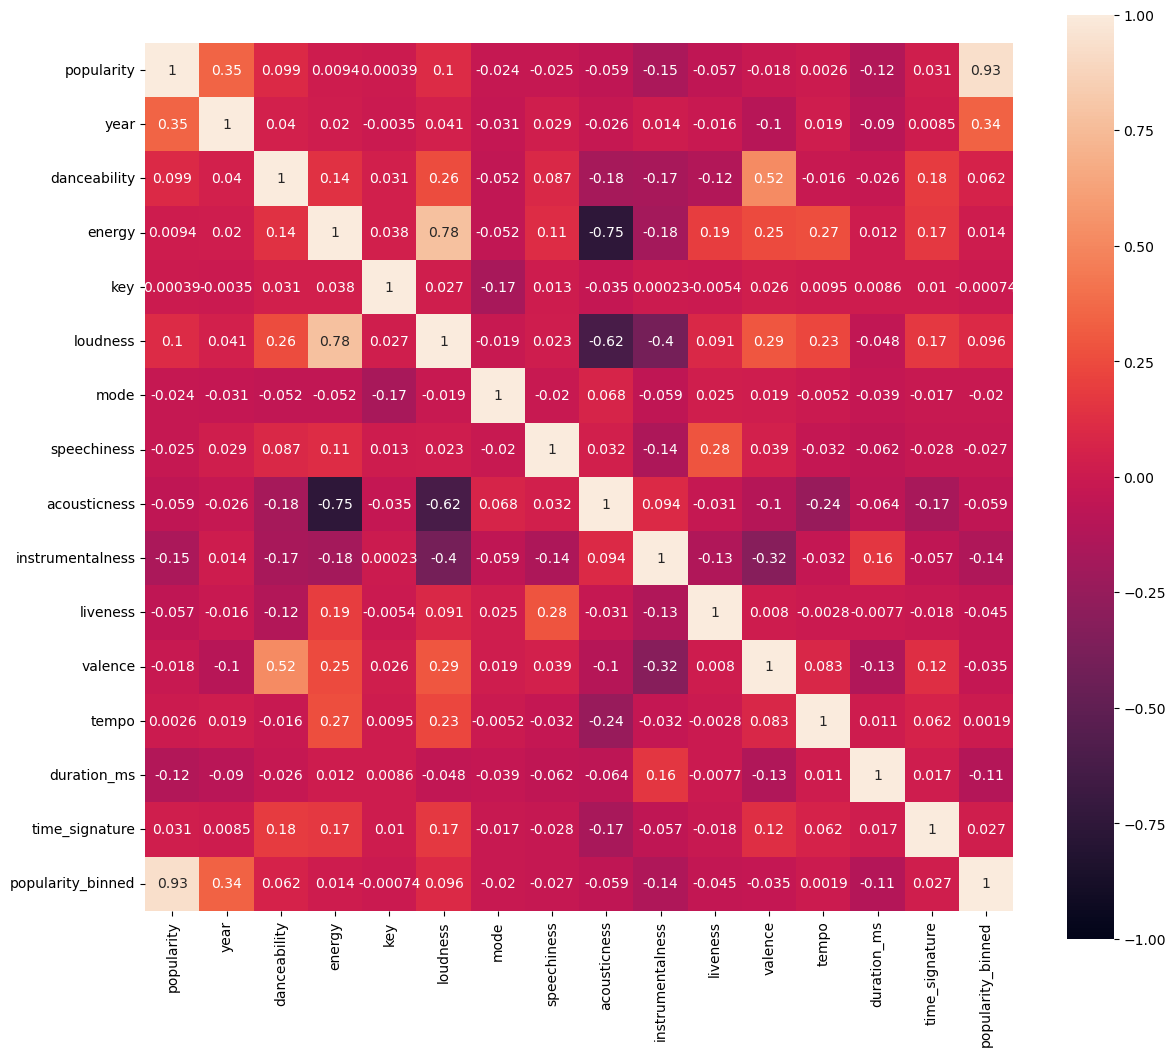

In [156]:
# Pearson Method
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Árvores de Decisão

Vamos agora criar um modelo de árvores de decisão para prever o intervalo de popularidade de uma música.

In [169]:
classifier = DecisionTreeClassifier(random_state=2023)

Before training the model, we must assure that all features are non categorical.

In [172]:
continous_features = data.copy()
lb_make = LabelEncoder()
continous_features['artist_name'] = lb_make.fit_transform(continous_features['artist_name'])
continous_features['genre'] = lb_make.fit_transform(continous_features['genre'])
continous_features

,artist_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_binned
0,26235,68,2012,0,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3,4.0
1,26235,50,2012,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4,4.0
2,28122,57,2012,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4,4.0
3,7629,58,2012,0,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4,4.0
4,3014,54,2012,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,40236,4,2011,81,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3,1.0
1159760,40236,3,2011,81,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4,1.0
1159761,2723,2,2011,81,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4,0.0
1159762,43073,0,2011,81,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3,0.0


In [174]:
X = continous_features.drop(['popularity', 'popularity_binned'], axis=1)
y = continous_features['popularity_binned'].to_frame()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [176]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [178]:
d_tree_predictions = classifier.predict(X_test)
d_tree_predictions

array([0., 4., 2., ..., 4., 0., 1.])

In [181]:
accuracy_score(y_test, d_tree_predictions)

0.4897548121859275